# Part 2: EDA and ML

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## EDA

In [2]:
with open("countries_data_munged.pkl", 'rb') as picklefile: 
    countries = pickle.load(picklefile)

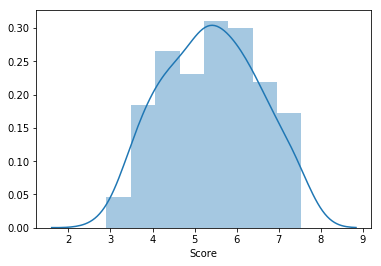

In [3]:
sns.distplot(countries.Score, hist = True, label = 'World Happiness Scores')

In [4]:
countries.describe()

,Score,Social support,Freedom to make life choices,Generosity,Trust,Population,Land_Area,Support_Ratio,Urbanization,Median_Mothers_Age,...,Fertility_Rate,Hospital_Bed_Density,Access_To_Clean_Water,Obesity_Rate,School_Life_Expectancy,GDP,GDP_per_capita,Unemployment_Rate,Electrification_Rate,Population Density
count,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,1.500000e+02
mean,5.388247,1.199147,0.409927,0.247507,0.123207,4.877966e+07,8.270407e+05,11.999329,0.604615,24.223684,...,2.598243,3.089781,0.883374,0.184510,13.572519,1.633023e+11,21806.711409,0.112098,0.794074,7.169172e+05
std,1.117987,0.273863,0.151343,0.136247,0.103005,1.576175e+08,2.055728e+06,10.456041,0.223619,3.402137,...,1.321674,2.432751,0.150722,0.089493,2.924166,2.204976e+11,21955.570342,0.127288,0.316021,8.601183e+06
min,2.905000,0.396000,0.000000,0.000000,0.000000,3.397470e+05,1.000000e+00,2.300000,0.083000,17.900000,...,0.830000,0.100000,0.317000,0.021000,5.000000,1.056000e+09,800.000000,0.003000,0.010000,1.974981e+00
25%,4.519250,1.049250,0.307500,0.153500,0.057000,5.327853e+06,5.478225e+04,4.800000,0.433500,21.325000,...,1.657500,1.225000,0.826250,0.088250,12.000000,1.992750e+10,5550.000000,0.043000,0.675000,3.569117e+01
50%,5.302000,1.259000,0.438500,0.232000,0.089000,1.147905e+07,2.152165e+05,10.250000,0.607000,24.223684,...,2.080000,2.650000,0.953000,0.203500,13.572519,6.430000e+10,14800.000000,0.070000,0.990000,8.400662e+01
75%,6.152250,1.419000,0.519750,0.325750,0.152500,3.691537e+07,6.531885e+05,16.750000,0.789000,26.875000,...,3.010000,4.300000,0.997000,0.246750,15.000000,2.152250e+11,31425.000000,0.118750,1.000000,2.005088e+02
max,7.537000,1.611000,0.658000,0.838000,0.464000,1.379303e+09,1.637774e+07,83.400000,1.000000,31.000000,...,6.490000,13.700000,1.000000,0.379000,20.000000,9.261000e+11,124900.000000,0.950000,1.000000,1.053500e+08


In [5]:
countries.sort_values('Score', ascending = False).head(10)

,Country,Score,Social support,Freedom to make life choices,Generosity,Trust,Population,Land_Area,Support_Ratio,Urbanization,...,Fertility_Rate,Hospital_Bed_Density,Access_To_Clean_Water,Obesity_Rate,School_Life_Expectancy,GDP,GDP_per_capita,Unemployment_Rate,Electrification_Rate,Population Density
95,Norway,7.537,1.534,0.635,0.362,0.316,5320045.0,304282.0,4.0,0.810,...,1.85,3.85,1.000,0.231,18.000000,3.759000e+11,70600.0,0.040,1.0,17.483929
33,Denmark,7.522,1.551,0.626,0.355,0.401,5605948.0,42434.0,3.4,0.880,...,1.73,3.50,1.000,0.197,19.000000,2.855000e+11,49600.0,0.058,1.0,132.109818
53,Iceland,7.504,1.611,0.627,0.476,0.154,339747.0,100250.0,4.8,0.943,...,2.00,3.18,1.000,0.219,20.000000,1.773000e+10,52100.0,0.028,1.0,3.388998
121,Switzerland,7.494,1.517,0.620,0.291,0.367,8236303.0,39997.0,3.7,0.741,...,1.56,5.00,1.000,0.195,16.000000,5.167000e+11,61400.0,0.030,1.0,205.923019
40,Finland,7.469,1.540,0.618,0.245,0.383,5518371.0,303815.0,3.1,0.845,...,1.75,4.53,1.000,0.222,19.000000,2.424000e+11,44000.0,0.087,1.0,18.163590
90,Netherlands,7.377,1.429,0.585,0.470,0.283,17084719.0,33893.0,3.6,0.915,...,1.78,4.70,1.000,0.204,18.000000,9.152000e+11,53600.0,0.051,1.0,504.078099
25,Canada,7.316,1.481,0.611,0.436,0.287,35623680.0,9093507.0,4.2,0.822,...,1.60,2.70,0.998,0.294,13.572519,1.764000e+09,48100.0,0.065,1.0,3.917485
91,New Zealand,7.314,1.548,0.614,0.500,0.383,4510327.0,264537.0,4.5,0.864,...,2.02,2.30,1.000,0.308,19.000000,1.857000e+11,38500.0,0.049,1.0,17.049891
6,Australia,7.284,1.510,0.602,0.478,0.301,23232413.0,7682300.0,4.4,0.897,...,1.77,3.90,1.000,0.290,20.000000,1.235000e+09,49900.0,0.056,1.0,3.024148
120,Sweden,7.284,1.478,0.613,0.385,0.384,9960487.0,410335.0,3.2,0.861,...,1.88,2.54,1.000,0.206,18.000000,5.217000e+11,51300.0,0.066,1.0,24.274037


In [6]:
countries.sort_values('Score').head(10)

,Country,Score,Social support,Freedom to make life choices,Generosity,Trust,Population,Land_Area,Support_Ratio,Urbanization,...,Fertility_Rate,Hospital_Bed_Density,Access_To_Clean_Water,Obesity_Rate,School_Life_Expectancy,GDP,GDP_per_capita,Unemployment_Rate,Electrification_Rate,Population Density
22,Burundi,2.905,0.630,0.060,0.204,0.084,11466756.0,25680.000000,21.1,0.127,...,5.99,1.900000,0.759,0.054,11.000000,7.985000e+09,800.0,0.112098,0.05,446.524766
125,Tanzania,3.349,1.042,0.390,0.354,0.066,53950935.0,885800.000000,16.6,0.330,...,4.77,0.700000,0.556,0.084,8.000000,1.628000e+11,3300.0,0.103000,0.24,60.906452
122,Syria,3.462,0.396,0.082,0.494,0.151,18028549.0,183630.000000,14.3,0.585,...,2.50,1.500000,0.901,0.278,9.000000,5.028000e+10,2900.0,0.500000,0.96,98.178669
106,Rwanda,3.471,0.946,0.582,0.253,0.455,11901484.0,24668.000000,20.1,0.307,...,3.87,1.600000,0.761,0.058,11.000000,2.461000e+10,2100.0,0.027000,0.21,482.466515
127,Togo,3.495,0.432,0.380,0.197,0.096,7965055.0,54385.000000,19.8,0.410,...,4.38,0.700000,0.631,0.084,12.000000,1.243000e+10,1600.0,0.069000,0.27,146.456836
48,Guinea,3.507,0.791,0.349,0.265,0.111,12413867.0,245717.000000,17.8,0.382,...,4.77,0.300000,0.768,0.077,9.000000,2.645000e+10,2000.0,0.028000,0.26,50.520994
71,Liberia,3.533,0.872,0.333,0.267,0.039,4689021.0,96320.000000,18.1,0.505,...,5.06,0.800000,0.756,0.099,13.572519,3.906000e+09,900.0,0.028000,0.10,48.681696
116,South Sudan,3.591,0.601,0.147,0.286,0.117,13026129.0,827040.656757,15.7,0.193,...,5.07,3.089781,0.587,0.066,13.572519,1.975000e+10,1500.0,0.112098,0.01,716917.184175
141,Yemen,3.593,0.935,0.249,0.104,0.057,28036829.0,527968.000000,19.8,0.358,...,3.63,0.700000,0.549,0.171,9.000000,6.895000e+10,2300.0,0.270000,0.48,53.103273
49,Haiti,3.603,0.640,0.030,0.489,0.100,10646714.0,27560.000000,13.3,0.609,...,2.72,1.300000,0.577,0.227,13.572519,1.988000e+10,1800.0,0.406000,0.38,386.310377


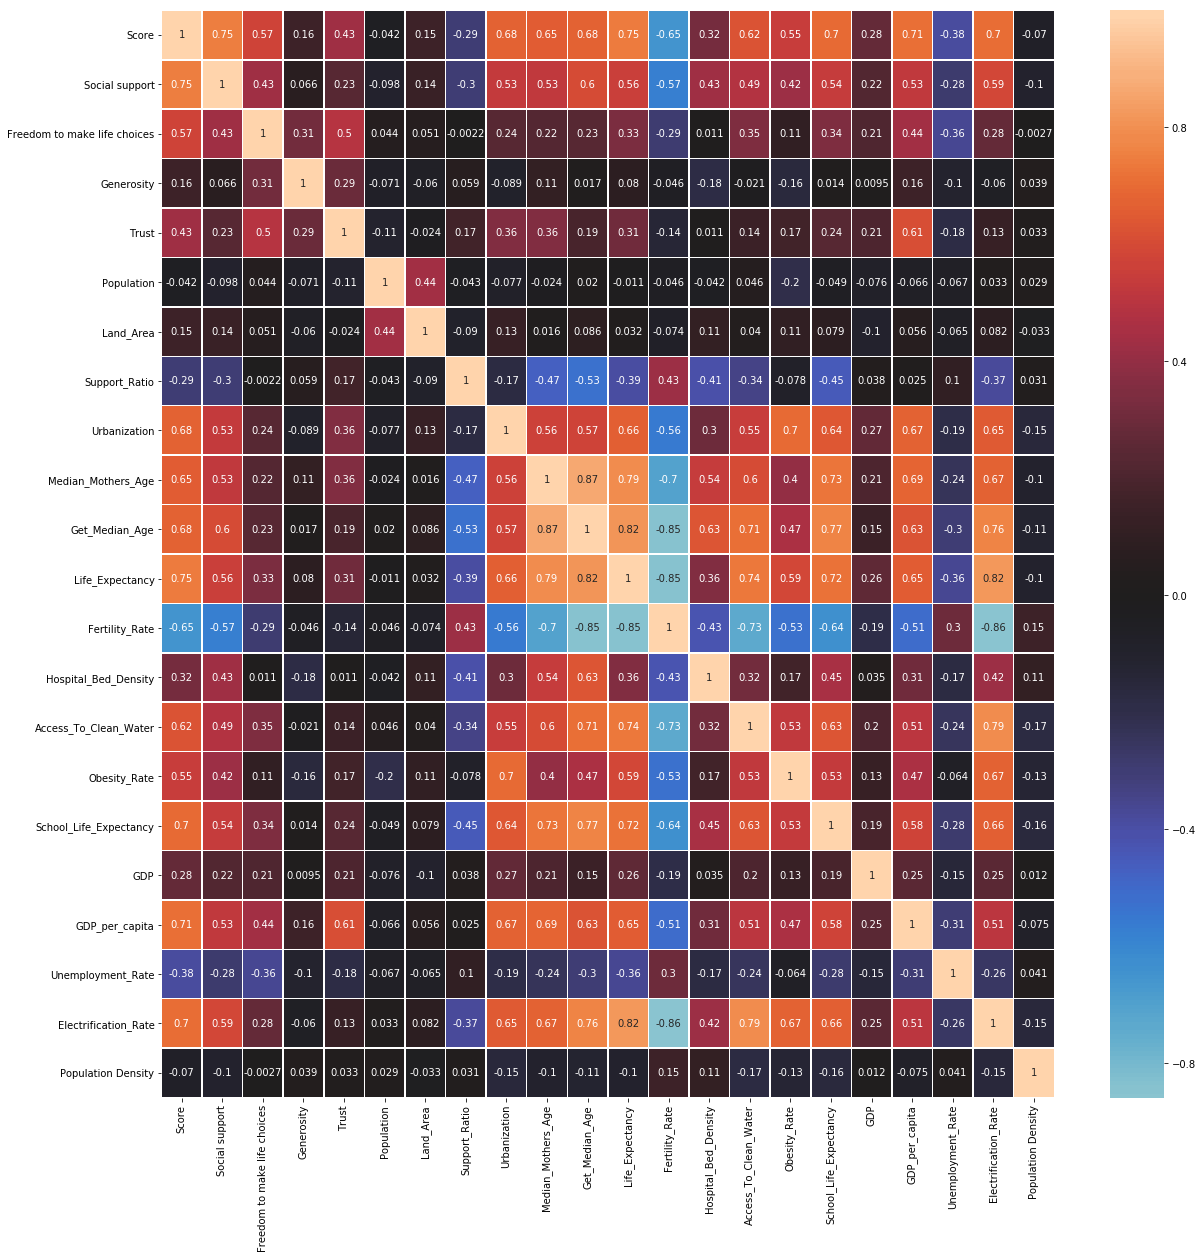

In [7]:
plt.figure(figsize = (20,20))

ax = sns.heatmap(countries.corr(), annot=True, linewidths=.5, center = 0)

In [8]:
countries.corr().sort_values('Score', ascending = False).Score

Score                           1.000000
Social support                  0.749257
Life_Expectancy                 0.745372
GDP_per_capita                  0.713507
Electrification_Rate            0.703249
School_Life_Expectancy          0.698962
Get_Median_Age                  0.679875
Urbanization                    0.677217
Median_Mothers_Age              0.652955
Access_To_Clean_Water           0.624816
Freedom to make life choices    0.572776
Obesity_Rate                    0.549413
Trust                           0.432747
Hospital_Bed_Density            0.324390
GDP                             0.278664
Generosity                      0.157282
Land_Area                       0.151646
Population                     -0.042003
Population Density             -0.070205
Support_Ratio                  -0.292956
Unemployment_Rate              -0.381854
Fertility_Rate                 -0.653119
Name: Score, dtype: float64

In [9]:
#countries = countries.drop(['Population Density', 'GDP','Land_Area','Population','Generosity'], axis = 1)

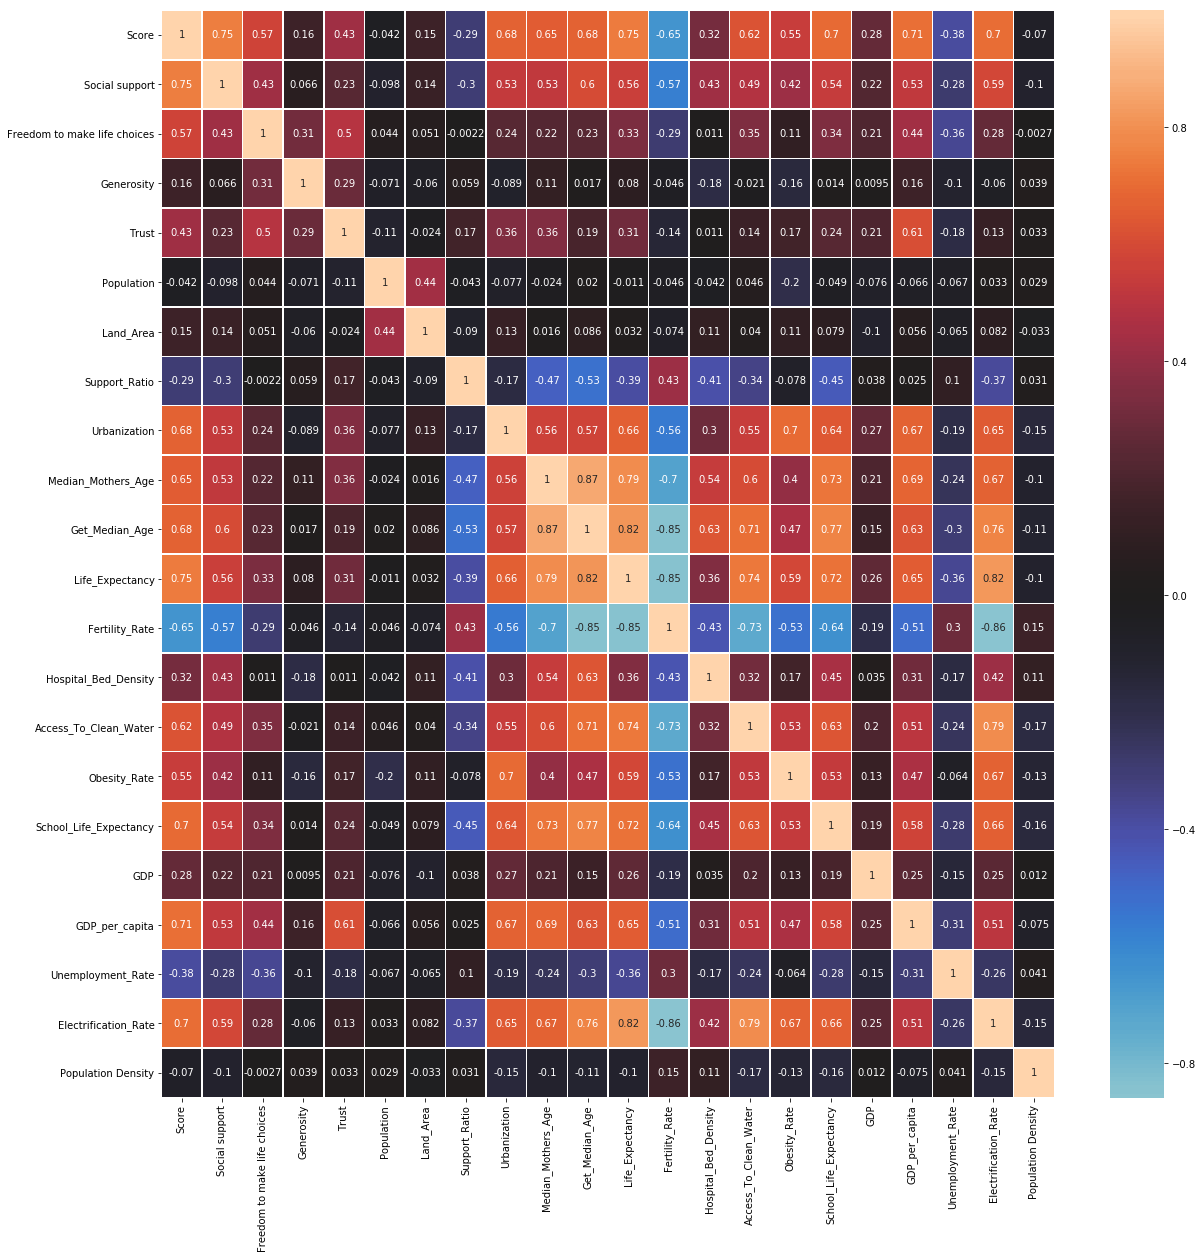

In [10]:
plt.figure(figsize = (20,20))

ax = sns.heatmap(countries.corr(), annot=True, linewidths=.5, center = 0)

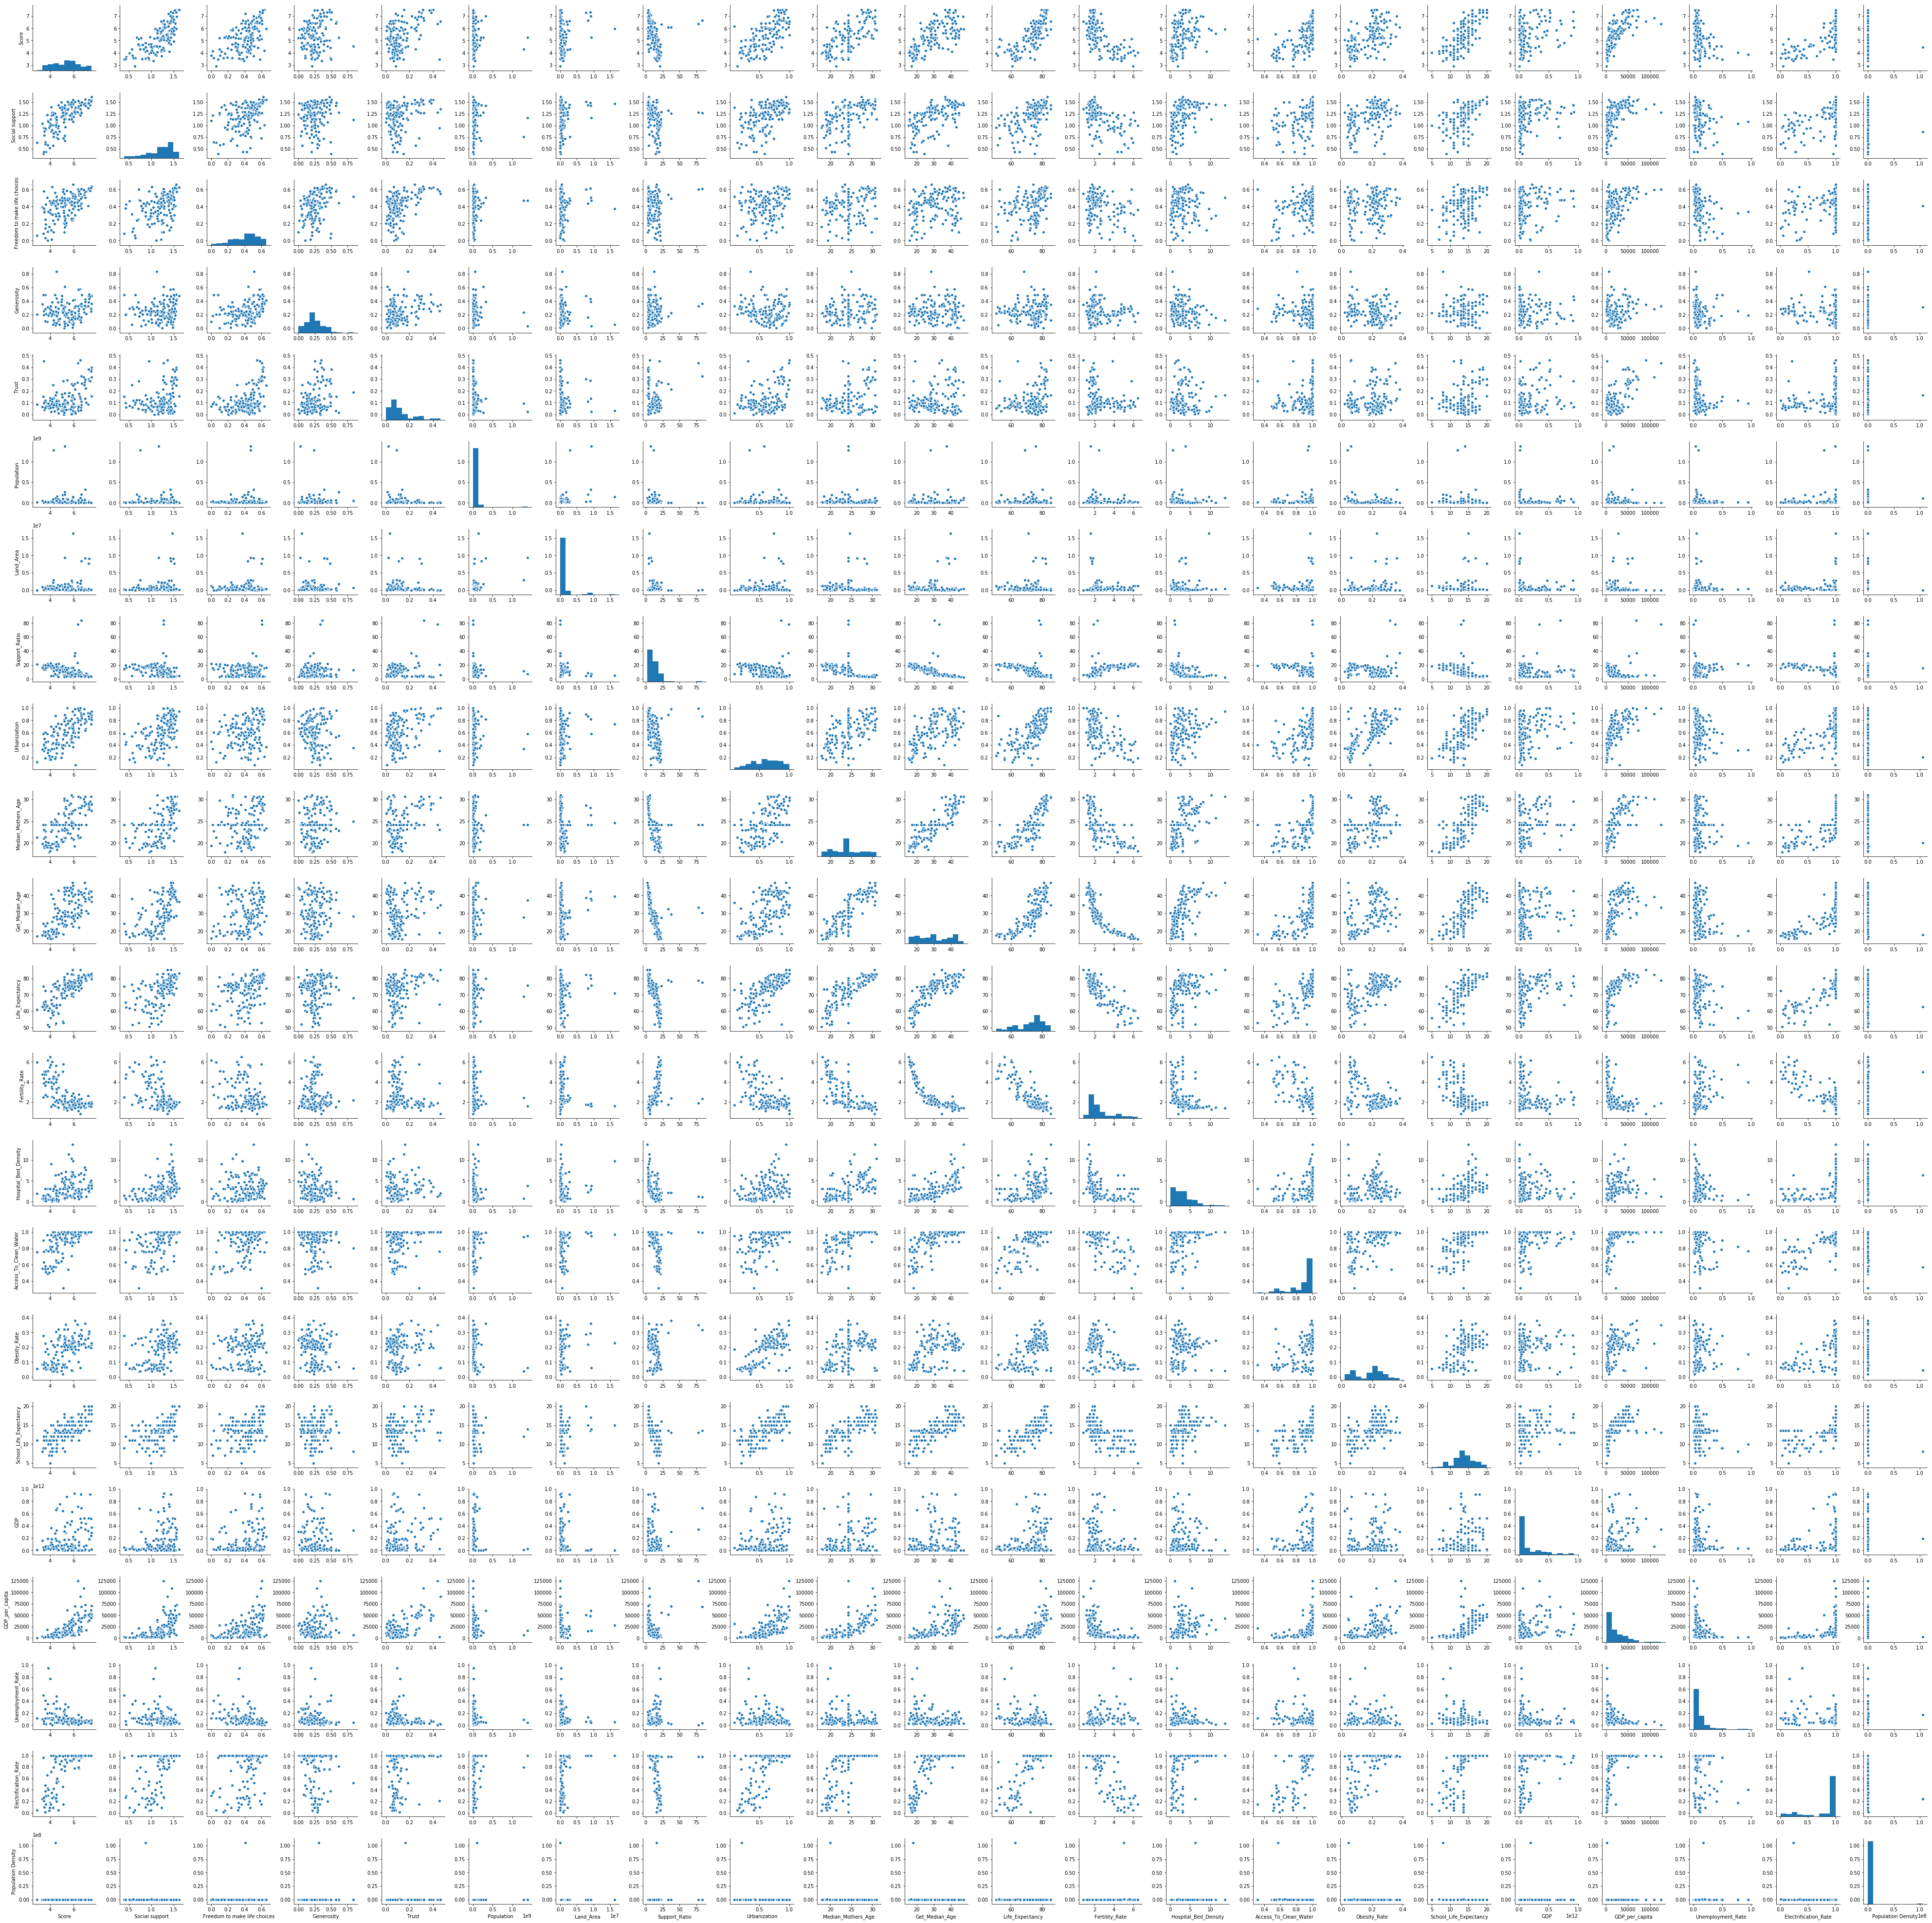

In [11]:
sns.pairplot(countries)

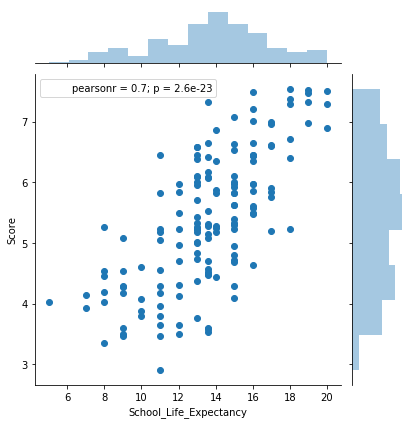

In [12]:
sns.jointplot(countries.School_Life_Expectancy, countries.Score)

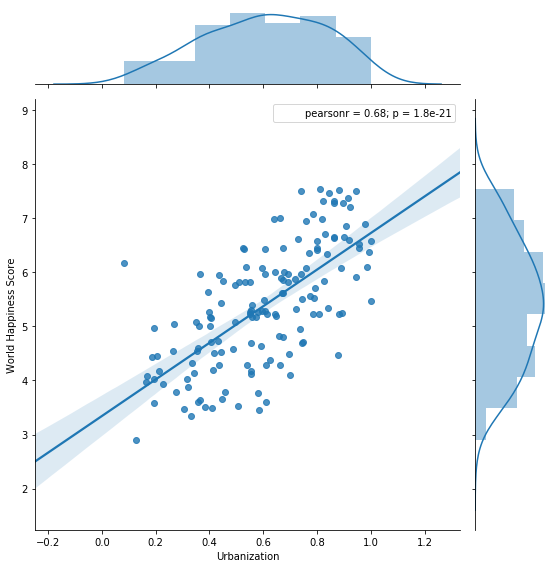

In [13]:
sns.jointplot(x='Urbanization', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('Urbanization')
plt.ylabel("World Happiness Score");
#plt.title('World Happiness Score vs. Urbanization')

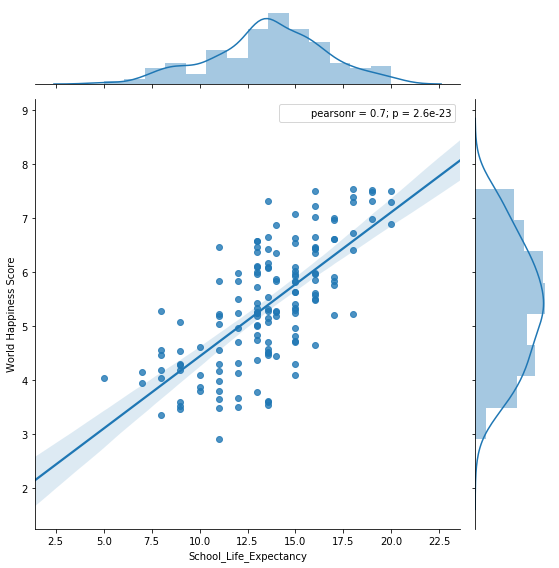

In [14]:
sns.jointplot(x='School_Life_Expectancy', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('School_Life_Expectancy')
plt.ylabel("World Happiness Score");
#plt.title('World Happiness Score vs. Urbanization')

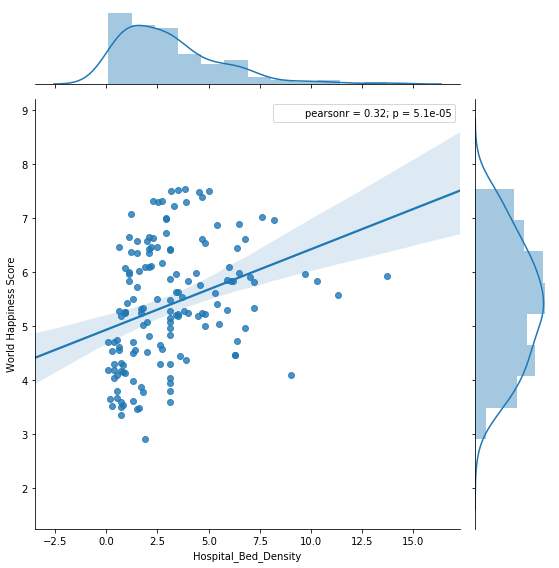

In [15]:
sns.jointplot(x='Hospital_Bed_Density', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('Hospital_Bed_Density')
plt.ylabel("World Happiness Score");
#plt.title('World Happiness Score vs. Urbanization')

Train/Test Split:

In [29]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(countries.iloc[:,2:], countries.Score, test_size=0.3)

lr.fit(X_train, y_train)

lr.score(X_test, y_test)


0.73852605865350784

Cross Validation with 10 folds:

In [30]:
# 10-fold cross-validation
reg = LinearRegression()
r2_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='mean_squared_error')

print('r2',r2_scores)
print('mse',-mse_scores)

r2 [ 0.77212324  0.81606308  0.68675616  0.61578621  0.81411162  0.88877588
  0.59346266  0.71849479  0.83224826  0.74792263]
mse [ 0.19808276  0.31707615  0.37087222  0.25459496  0.15287072  0.13609226
  0.41404393  0.21146418  0.28335343  0.35718173]


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl

In [32]:
est=LinearRegression()
from sklearn import feature_selection as f_select

#sig_columns=[]
#pvals=[] # will be the list of all significant columns' p-values

for feature in countries.iloc[:,2:].columns:
    #get pval on feature by feature basis
    pval=f_select.f_regression(X_train[[feature]],y_train)[1] # gets f-value and p-value
    #print(feature,'------', pval[0])
    print(feature)

Social support
Freedom to make life choices
Trust
Support_Ratio
Urbanization
Median_Mothers_Age
Get_Median_Age
Life_Expectancy
Fertility_Rate
Hospital_Bed_Density
Access_To_Clean_Water
Obesity_Rate
School_Life_Expectancy
GDP
GDP_per_capita
Unemployment_Rate
Electrification_Rate


Due to high p-values, remove 'Generosity', 'Population','Land_Area' and 'Population Density'.

In [19]:
countries = countries.drop(['Generosity','Population','Land_Area','Population Density'], axis = 1)

In [33]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(countries.iloc[:,2:], countries.Score, test_size=0.3)

lr.fit(X_train, y_train)

lr.score(X_test, y_test)


0.69455193795055226

In [36]:
model = sm.OLS(y_train,X_train)
fit1 = model.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     755.6
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.25e-87
Time:                        15:35:31   Log-Likelihood:                -65.580
No. Observations:                 105   AIC:                             165.2
Df Residuals:                      88   BIC:                             210.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.4368      0.245      5.874      0.000       0.951       1.923
Freedom to make life choices     1.2781      0.494      2.588      0.011       0.297       2.259
Trust                            0.6938      0.713      0.973      0.333      -0.724       2.111
Support_Ratio                   -0.0101      0.006     -1.708      0.091      -0.022       0.002
Urbanization                     0.4194      0.440      0.953      0.343      -0.455       1.294
Median_Mothers_Age              -0.0320      0.036     -0.894      0.374      -0.103       0.039
Get_Median_Age                   0.0169      0.020      0.855      0.395      -0.022       0.056
Life_Expectancy                  0.0198      0.012      1.600      0.113      -0.005       0.044
Fertility_Rate                   0.1806      0.077      2.333      0.022       0.027       0.334
Hospital_Bed_Density            -0.0406      0.035     -1.147      0.255      -0.111       0.030
Access_To_Clean_Water            0.0417      0.551      0.076      0.940      -1.053       1.136
Obesity_Rate                     0.9349      1.060      0.882      0.380      -1.172       3.042
School_Life_Expectancy           0.0275      0.032      0.850      0.398      -0.037       0.092
GDP                           6.667e-14   2.47e-13      0.270      0.788   -4.25e-13    5.58e-13
GDP_per_capita                7.461e-06   4.18e-06      1.784      0.078    -8.5e-07    1.58e-05
Unemployment_Rate               -0.3480      0.388     -0.897      0.372      -1.119       0.423
Electrification_Rate             0.8872      0.438      2.023      0.046       0.016       1.759
==============================================================================
Omnibus:                        1.331   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                0.833
Skew:                           0.051   Prob(JB):                        0.659
Kurtosis:                       3.424   Cond. No.                     6.24e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# 10-fold cross-validation
reg = LinearRegression()
r2_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='mean_squared_error')

print('r2',r2_scores)
print('mse',-mse_scores)

r2 [ 0.73325005  0.78029687  0.71612247  0.78465122  0.80261806  0.83241698
  0.75803675  0.5679474   0.71375809  0.60970385]
mse [ 0.34557823  0.28092432  0.33153773  0.25374504  0.27201466  0.10653069
  0.18925311  0.31581433  0.26660137  0.30665161]


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl

In [22]:
est=LinearRegression()
from sklearn import feature_selection as f_select

#sig_columns=[]
#pvals=[] # will be the list of all significant columns' p-values

for feature in countries.iloc[:,2:].columns:
    #get pval on feature by feature basis
    pval=f_select.f_regression(X_train[[feature]],y_train)[1] # gets f-value and p-value
    print(feature,'------', pval[0])

Social support ------ 3.76798473903e-21
Freedom to make life choices ------ 1.27165922517e-11
Trust ------ 1.33395051562e-05
Support_Ratio ------ 0.000752676868326
Urbanization ------ 1.11527126119e-12
Median_Mothers_Age ------ 3.78870931653e-13
Get_Median_Age ------ 9.20209991035e-15
Life_Expectancy ------ 1.0268482928e-17
Fertility_Rate ------ 3.82128281938e-14
Hospital_Bed_Density ------ 0.000287729127922
Access_To_Clean_Water ------ 6.42181970756e-11
Obesity_Rate ------ 5.09797960594e-08
School_Life_Expectancy ------ 4.5143558844e-14
GDP ------ 0.0184647134501
GDP_per_capita ------ 5.36302963122e-16
Unemployment_Rate ------ 8.35972498901e-07
Electrification_Rate ------ 1.36530695373e-16


In [23]:
encv = ElasticNetCV(cv = 10, alphas = [1e-5,1e-3,1,1e3,1e5])
encv.fit(X_train, y_train)
encv.score(X_test, y_test)


0.75347543307211884

In [24]:
mean_squared_error(y_test,encv.predict(X_test))

0.34555143096967939

In [25]:
encv.coef_

array([  1.23679578e+00,   1.73660482e+00,  -4.98796142e-02,
        -2.30669824e-02,   2.02091397e-01,   7.66433831e-03,
        -7.54633705e-03,   1.09039764e-02,   5.33351185e-02,
        -1.66425091e-02,  -5.96212597e-01,   1.14333400e+00,
         1.91327923e-02,  -2.18210118e-13,   1.57358554e-05,
        -4.57442191e-01,   5.68541845e-01])

In [26]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(encv.coef_)})

In [27]:
coefficients.sort_values('Coefficients',ascending = False)

,Coefficients,Feature
1,1.736605e+00,Freedom to make life choices
0,1.236796e+00,Social support
11,1.143334e+00,Obesity_Rate
16,5.685418e-01,Electrification_Rate
4,2.020914e-01,Urbanization
8,5.333512e-02,Fertility_Rate
12,1.913279e-02,School_Life_Expectancy
7,1.090398e-02,Life_Expectancy
5,7.664338e-03,Median_Mothers_Age
14,1.573586e-05,GDP_per_capita


In [28]:

# Create your model
model = sm.OLS(y_train,X_train)
# Fit your model to your training set
fit=model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     810.0
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           5.99e-89
Time:                        09:58:41   Log-Likelihood:                -60.817
No. Observations:                 105   AIC:                             155.6
Df Residuals:                      88   BIC:                             200.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.3297      0.240      5.542      0.000       0.853       1.807
Freedom to make life choices     1.9884      0.446      4.454      0.000       1.101       2.876
Trust                           -0.3591      0.803     -0.447      0.656      -1.955       1.236
Support_Ratio                   -0.0160      0.008     -2.088      0.040      -0.031      -0.001
Urbanization                     0.2469      0.339      0.728      0.468      -0.427       0.921
Median_Mothers_Age               0.0299      0.038      0.793      0.430      -0.045       0.105
Get_Median_Age                  -0.0010      0.017     -0.055      0.956      -0.035       0.033
Life_Expectancy                  0.0213      0.012      1.762      0.081      -0.003       0.045
Fertility_Rate                   0.1431      0.080      1.783      0.078      -0.016       0.303
Hospital_Bed_Density            -0.0198      0.028     -0.703      0.484      -0.076       0.036
Access_To_Clean_Water           -0.6239      0.542     -1.152      0.253      -1.701       0.453
Obesity_Rate                     1.3572      0.877      1.547      0.125      -0.386       3.101
School_Life_Expectancy           0.0154      0.031      0.490      0.625      -0.047       0.078
GDP                           -2.42e-13   2.74e-13     -0.883      0.380   -7.87e-13    3.03e-13
GDP_per_capita                1.146e-05   4.86e-06      2.358      0.021     1.8e-06    2.11e-05
Unemployment_Rate               -0.4249      0.382     -1.112      0.269      -1.184       0.335
Electrification_Rate             0.5553      0.401      1.384      0.170      -0.242       1.352
==============================================================================
Omnibus:                        4.050   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.390
Skew:                          -0.381   Prob(JB):                        0.184
Kurtosis:                       3.441   Cond. No.                     4.79e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""